# Modeling Driven RLC Circuit with Experimental Data and Computational Mode

In [5]:
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics
from tqdm import tqdm

In [6]:
# Constants
resistance = [45.7, 60.4]
inductance = 0.02421893575
capacitance = [0.00001, 0.000001]
voltage = [5, 10]
frequency_initial = 0
frequency_final = 2000

In [7]:
def compute_models(resistance, inductance, capacitances, voltage):
    responseCurves = []

    for i in range(len(capacitances)):
        capacitance = capacitances[i]
        def compute_model(frequency):
            angular_frequency = 2 * math.pi * frequency

            def compute_acceleration(t, charge, current, _current_prime):
                return voltage * math.sin(angular_frequency * t) / inductance / 2 - resistance * current / inductance - charge / (inductance * capacitance)

            times = np.linspace(0, 0.1, 10001)
            _, _, current, _ = model_utils.euler_method(compute_acceleration, times=times)

            # Calculate the amplitude by checking the max value in the last five seconds
            return max(current[-5000:])

        frequencies = np.linspace(frequency_initial, frequency_final, 201)
        amplitudes = list(map(compute_model, tqdm(frequencies)))

        # Graph frequency vs amplitude
        responseCurves.append((frequencies, amplitudes, f"Computational {int(capacitance * 1000000)}µF"))
        model_utils.graph([(frequencies, amplitudes, "")], "Amplitude", "A", "Frequency", "Hz", "Computational", f"{resistance}Ω {round(inductance * 1000, 2)}mH {int(capacitance * 1000000)}µF {voltage}V", ".", f"Graphs/Computational/ResponseCurve_{resistance}Ω_{round(inductance * 1000, 2)}mH_{int(capacitance * 1000000)}µF_{voltage}V")

        try:
            data = pd.read_csv(f"Data/AmplitudeFrequency/Driven RLC {resistance}Ω {round(inductance * 1000, 2)}mH {int(capacitance * 1000000)}µF {voltage}V amplitude.csv")
            responseCurves.append((data["Frequency (Hz)"], data["Amplitude (A)"], f"Experimental {int(capacitance * 1000000)}µF"))
            model_utils.graph([(frequencies, amplitudes, "Computational"), (data["Frequency (Hz)"], data["Amplitude (A)"], "Experimental")], "Amplitude", "A", "Frequency", "Hz", name_suffix=f"{resistance}Ω {round(inductance * 1000, 2)}mH {int(capacitance * 1000000)}µF {voltage}V", type=".", directory=f"Graphs/ResponseCurve_{resistance}Ω_{round(inductance * 1000, 2)}mH_{int(capacitance * 1000000)}µF_{voltage}V")
        except:
            pass

    model_utils.graph(responseCurves, "Amplitude", "A", "Frequency", "Hz", name_suffix=f"{resistance}Ω {round(inductance * 1000, 2)}mH {voltage}V", type=".", directory=f"Graphs/ResponseCurve_{resistance}Ω_{round(inductance * 1000, 2)}mH_{voltage}V")

100%|██████████| 201/201 [00:01<00:00, 102.39it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


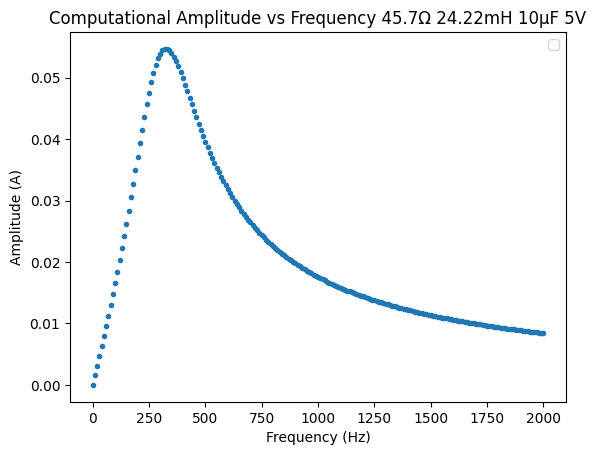

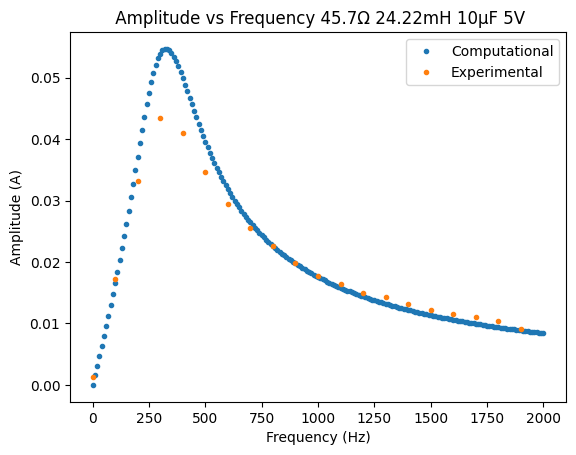

100%|██████████| 201/201 [00:02<00:00, 93.37it/s] 
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


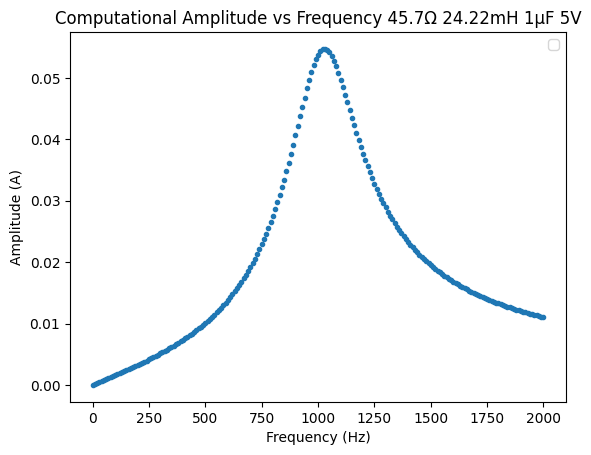

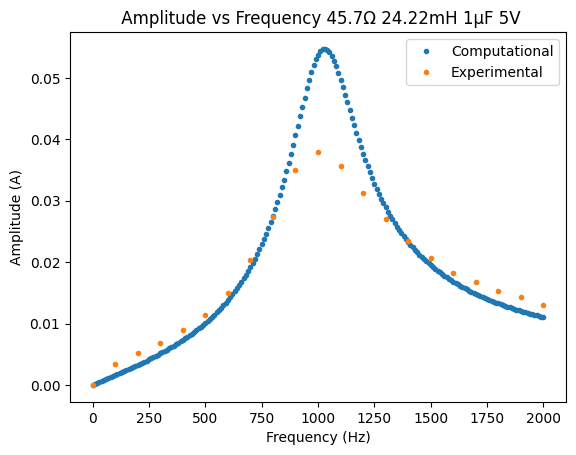

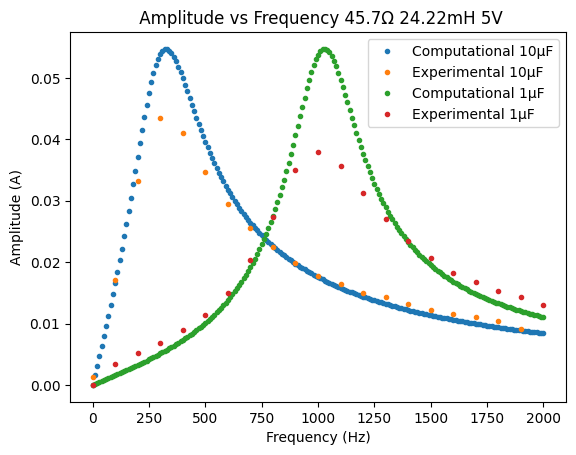

100%|██████████| 201/201 [00:01<00:00, 103.00it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


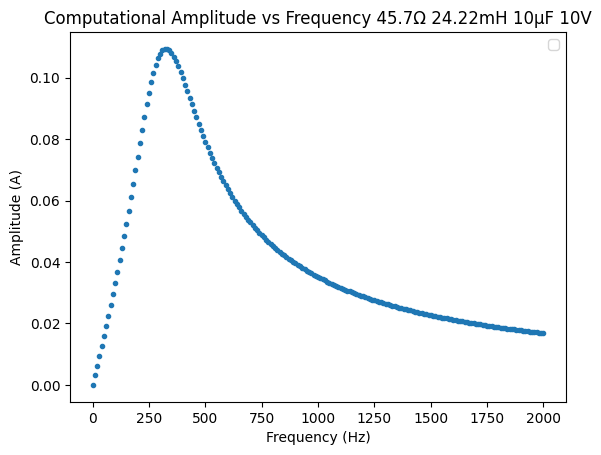

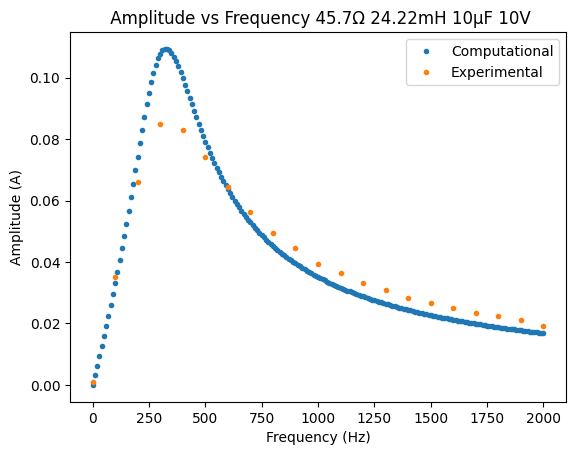

100%|██████████| 201/201 [00:01<00:00, 102.69it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


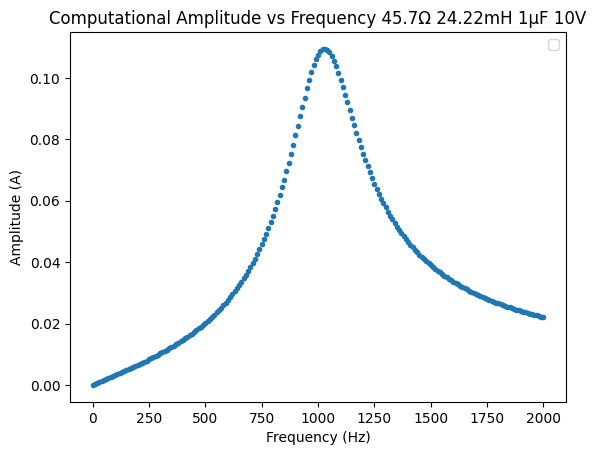

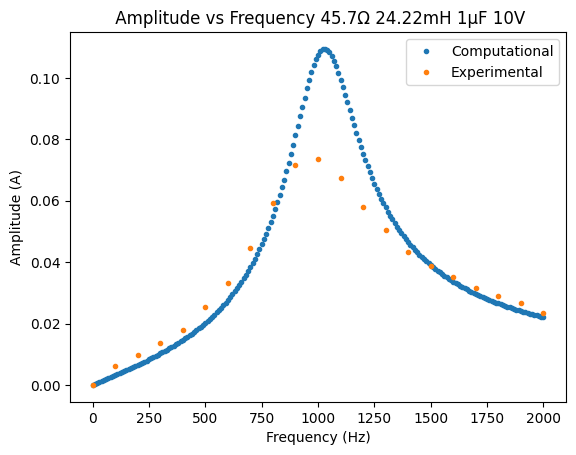

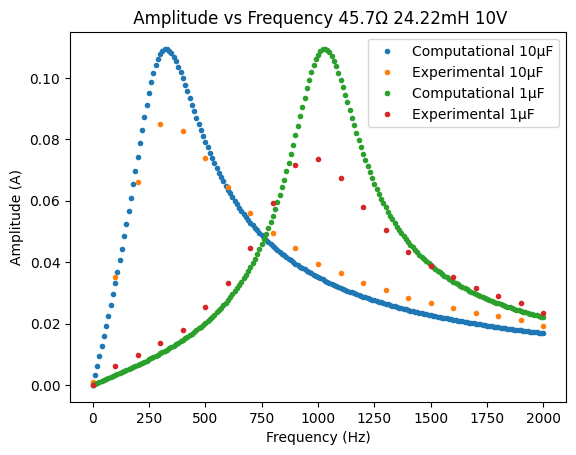

100%|██████████| 201/201 [00:01<00:00, 103.69it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


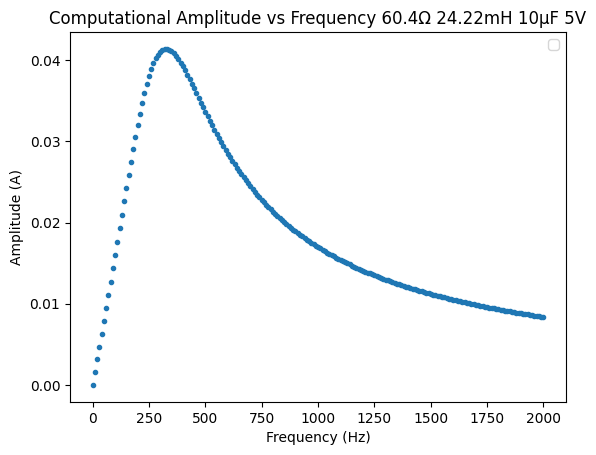

100%|██████████| 201/201 [00:03<00:00, 62.26it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


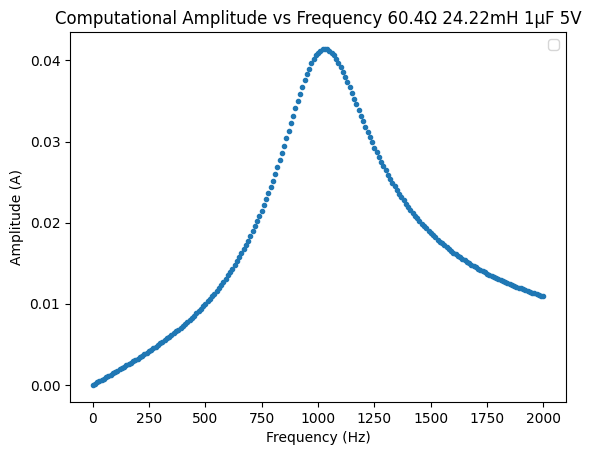

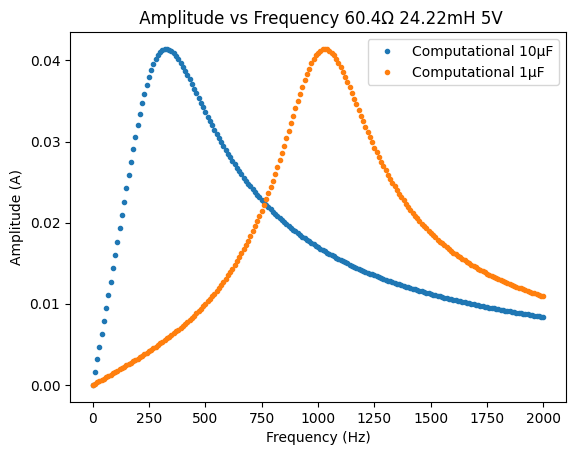

100%|██████████| 201/201 [00:02<00:00, 94.16it/s] 
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


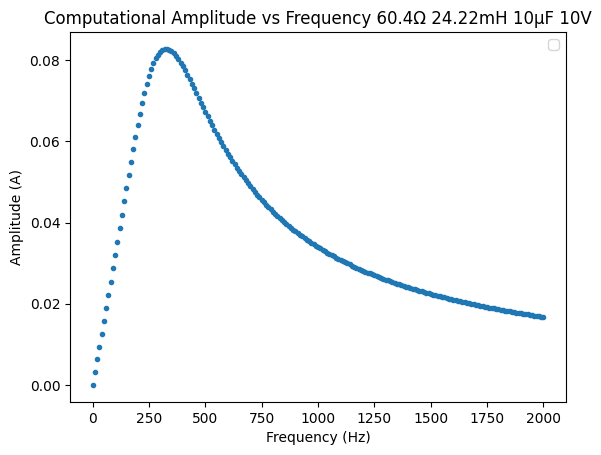

100%|██████████| 201/201 [00:02<00:00, 81.87it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


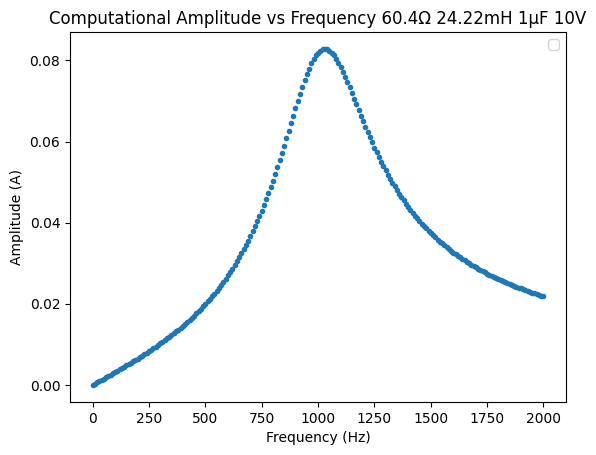

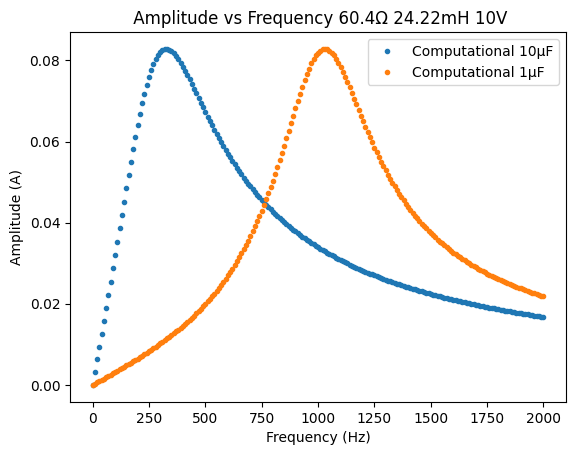

In [8]:
compute_models(resistance[0], inductance, capacitance, voltage[0])
compute_models(resistance[0], inductance, capacitance, voltage[1])
compute_models(resistance[1], inductance, capacitance, voltage[0])
compute_models(resistance[1], inductance, capacitance, voltage[1])